# Exercice 4: Self-Attention mechanism: Varying Parameters



1)  Modify the dimensionality of the embeddings for a given sentence. Experiment with embedding dimensions of 4, 8, and 16. Compute the query, key, and value matrices for each case. Visualize and compare the attention weights and outputs for different embedding dimensions.



Phrase: Deep learning revolutionizes artificial intelligence
nb  mots: 5
Input shape: (5, 4)
nb de paramètres par matrice Q/K/V: 16 = 4²
  (Wq + Wk + Wv): 48
  Mean: -0.1713
  Std: 0.9357
  Mean: 0.2000
  Std: 0.1211
  Entropie moyenne: 1.4489
  Concentration (max weight moyen): 0.3630
Input shape: (5, 8)
nb de paramètres par matrice Q/K/V: 64 = 8²
  (Wq + Wk + Wv): 192
  Mean: -0.2186
  Std: 0.9408
  Mean: 0.2000
  Std: 0.1171
  Entropie moyenne: 1.4602
  Concentration (max weight moyen): 0.3821
Input shape: (5, 16)
nb de paramètres par matrice Q/K/V: 256 = 16²
  (Wq + Wk + Wv): 768
  Mean: -0.1238
  Std: 0.9515
  Mean: 0.2000
  Std: 0.1306
  Entropie moyenne: 1.3969
  Concentration (max weight moyen): 0.4090


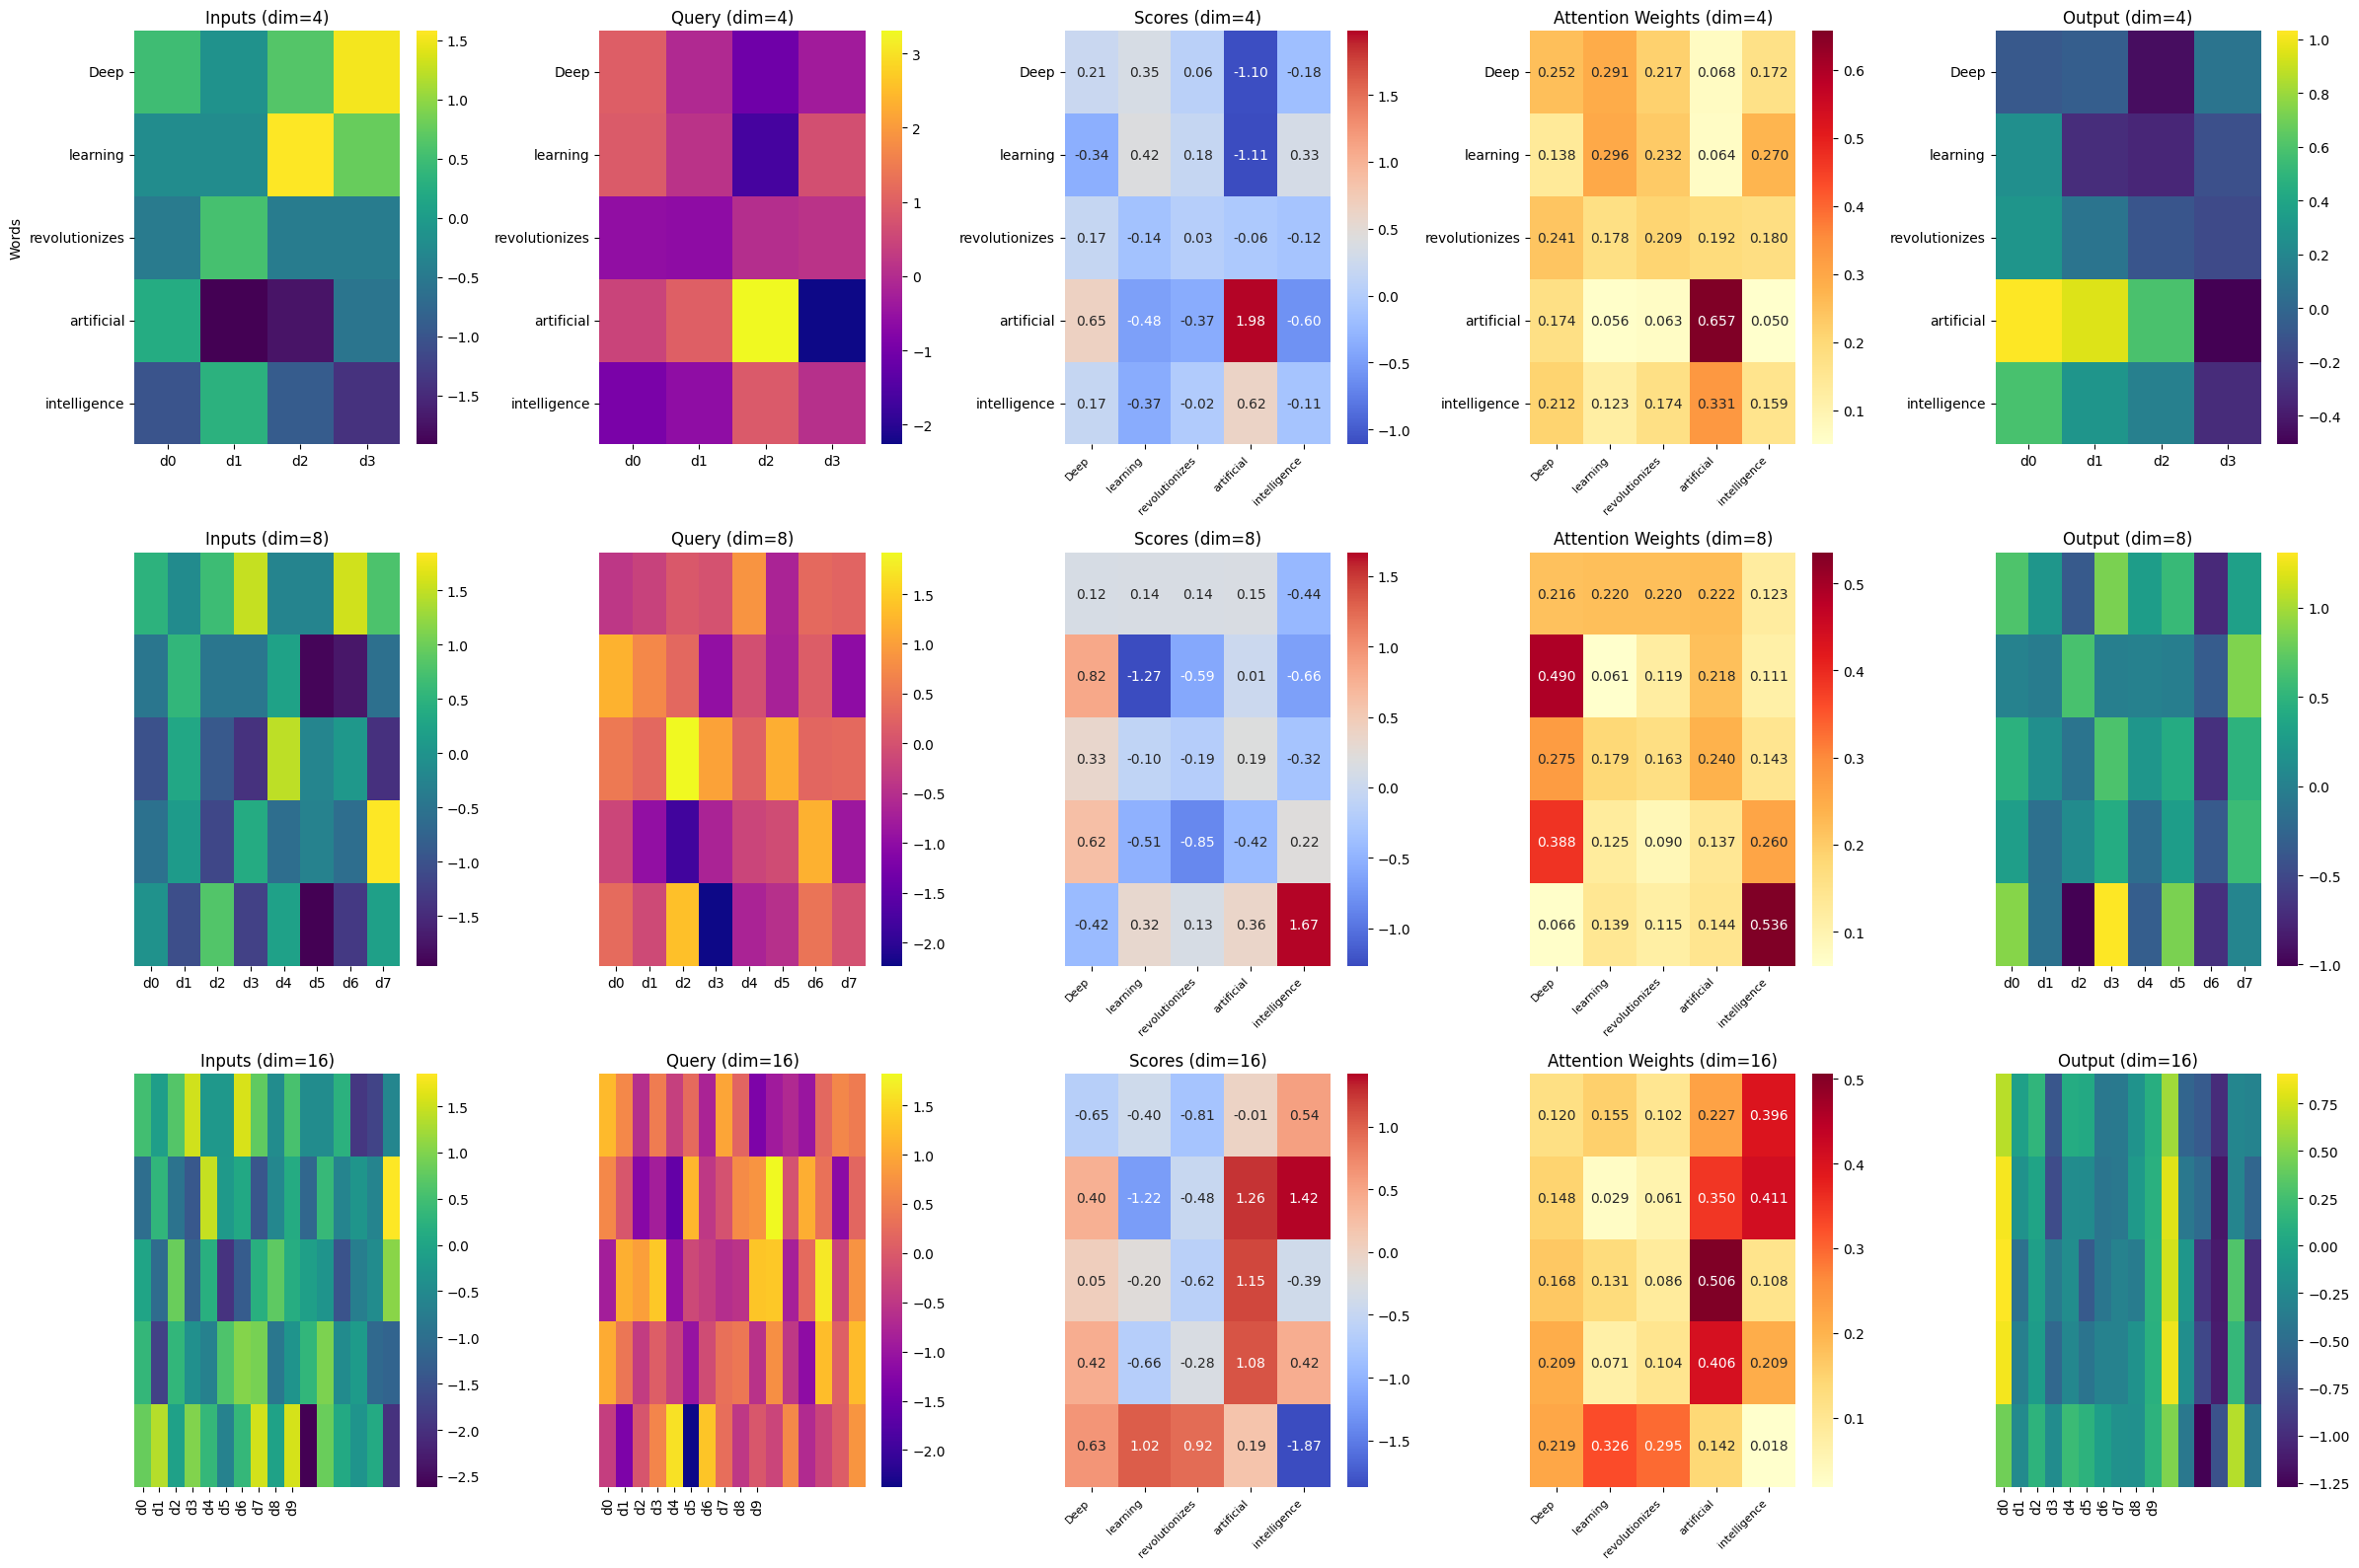

Text(0.5, 0, 'Embedding dimension')

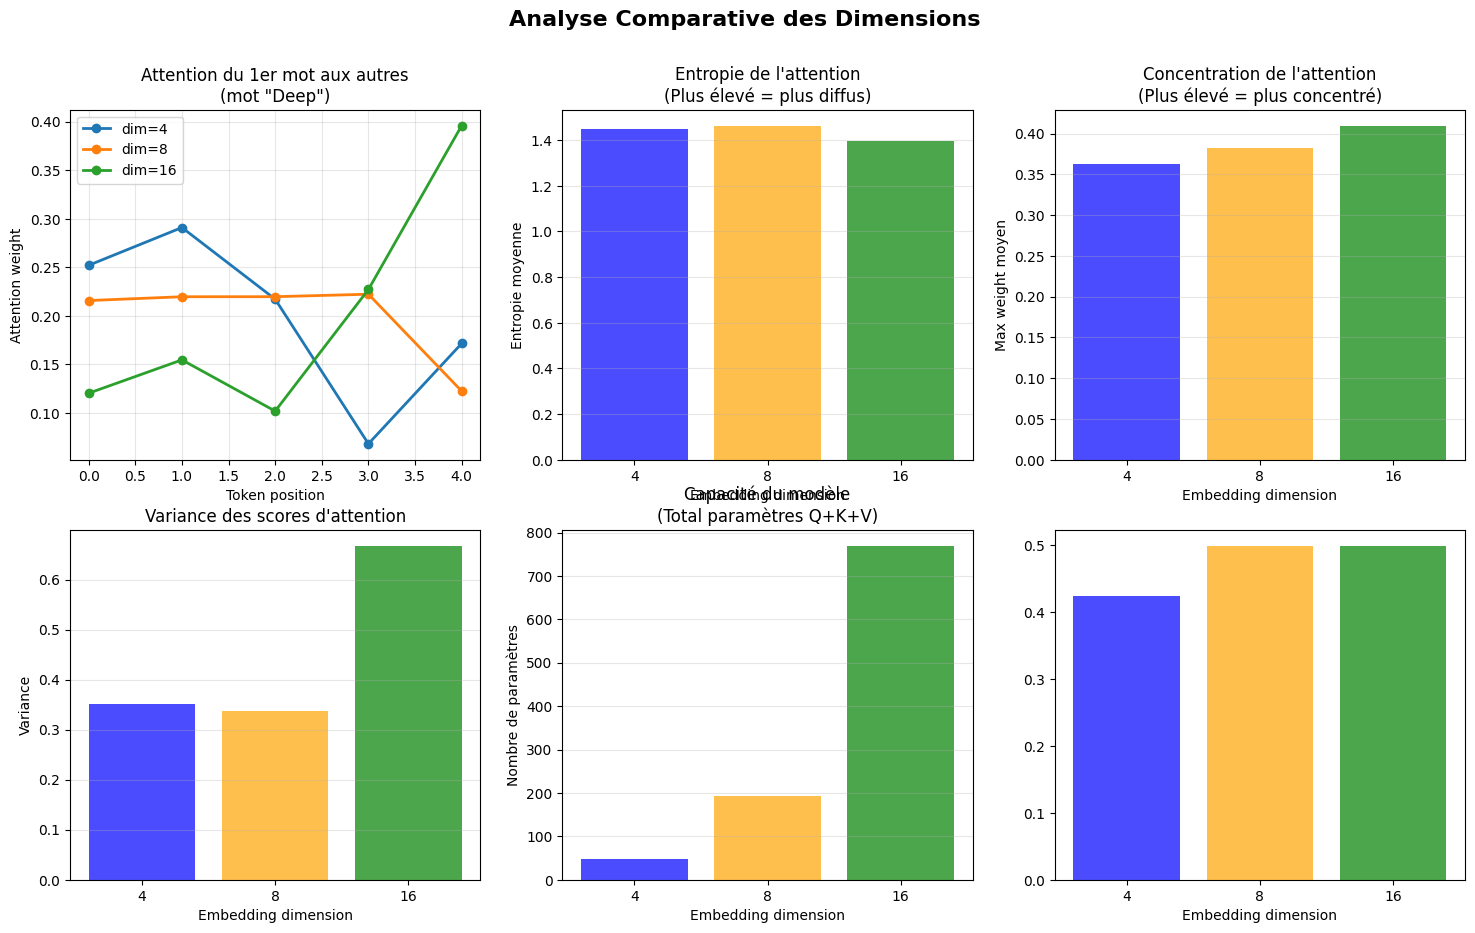

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def create_embeddings(sentence, embedding_dim, seed=42):
    np.random.seed(seed)
    embeddings = {}
    for word in sentence:
        embeddings[word] = np.random.randn(embedding_dim)
    return embeddings

def compute_attention(inputs, embedding_dim):
    np.random.seed(42)
    limit = np.sqrt(6.0 / (embedding_dim + embedding_dim))
    Wq = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
    Wk = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
    Wv = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
    
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    
    return Q, K, V, scores, attention_weights, output

sentence = ["Deep", "learning", "revolutionizes", "artificial", "intelligence"]


print(f"\nPhrase: {' '.join(sentence)}")
print(f"nb  mots: {len(sentence)}")

dimensions = [4, 8, 16]
results = {}

for dim in dimensions:

    
    embeddings_dict = create_embeddings(sentence, dim)
    inputs = np.array([embeddings_dict[word] for word in sentence])
    
    print(f"Input shape: {inputs.shape}")
    print(f"nb de paramètres par matrice Q/K/V: {dim * dim} = {dim}²")
    print(f"  (Wq + Wk + Wv): {3 * dim * dim}")
    
    Q, K, V, scores, attention_weights, output = compute_attention(inputs, dim)
    
    results[dim] = {
        'inputs': inputs,
        'Q': Q,
        'K': K,
        'V': V,
        'scores': scores,
        'attention_weights': attention_weights,
        'output': output
    }
    
    print(f"  Mean: {np.mean(inputs):.4f}")
    print(f"  Std: {np.std(inputs):.4f}")
    
    print(f"  Mean: {np.mean(attention_weights):.4f}")
    print(f"  Std: {np.std(attention_weights):.4f}")
    print(f"  Entropie moyenne: {-np.sum(attention_weights * np.log(attention_weights + 1e-9)) / len(sentence):.4f}")
    print(f"  Concentration (max weight moyen): {np.mean(np.max(attention_weights, axis=1)):.4f}")

fig = plt.figure(figsize=(24, 16))

row = 0
for dim in dimensions:
    data = results[dim]
    
    plt.subplot(len(dimensions), 5, row*5 + 1)
    sns.heatmap(data['inputs'], annot=False, cmap='viridis',
                xticklabels=[f'd{i}' for i in range(min(dim, 10))],
                yticklabels=sentence if row == 0 else [])
    plt.title(f'Inputs (dim={dim})')
    if row == 0:
        plt.ylabel('Words')
    
    plt.subplot(len(dimensions), 5, row*5 + 2)
    sns.heatmap(data['Q'], annot=False, cmap='plasma',
                xticklabels=[f'd{i}' for i in range(min(dim, 10))],
                yticklabels=sentence if row == 0 else [])
    plt.title(f'Query (dim={dim})')
    
    plt.subplot(len(dimensions), 5, row*5 + 3)
    sns.heatmap(data['scores'], annot=True, fmt='.2f', cmap='coolwarm',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [])
    plt.title(f'Scores (dim={dim})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.subplot(len(dimensions), 5, row*5 + 4)
    sns.heatmap(data['attention_weights'], annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [])
    plt.title(f'Attention Weights (dim={dim})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.subplot(len(dimensions), 5, row*5 + 5)
    sns.heatmap(data['output'], annot=False, cmap='viridis',
                xticklabels=[f'd{i}' for i in range(min(dim, 10))],
                yticklabels=sentence if row == 0 else [])
    plt.title(f'Output (dim={dim})')
    
    row += 1

plt.tight_layout()
plt.show()

fig2, axes = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Analyse Comparative des Dimensions', fontsize=16, fontweight='bold')

ax = axes[0, 0]
for i, dim in enumerate(dimensions):
    weights = results[dim]['attention_weights']
    ax.plot(weights[0, :], marker='o', label=f'dim={dim}', linewidth=2)
ax.set_xlabel('Token position')
ax.set_ylabel('Attention weight')
ax.set_title('Attention du 1er mot aux autres\n(mot "Deep")')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
entropies = []
for dim in dimensions:
    weights = results[dim]['attention_weights']
    entropy = -np.sum(weights * np.log(weights + 1e-9), axis=1)
    entropies.append(np.mean(entropy))
ax.bar([str(d) for d in dimensions], entropies, color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Embedding dimension')
ax.set_ylabel('Entropie moyenne')
ax.set_title('Entropie de l\'attention\n(Plus élevé = plus diffus)')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[0, 2]
concentrations = []
for dim in dimensions:
    weights = results[dim]['attention_weights']
    concentration = np.mean(np.max(weights, axis=1))
    concentrations.append(concentration)
ax.bar([str(d) for d in dimensions], concentrations, color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Embedding dimension')
ax.set_ylabel('Max weight moyen')
ax.set_title('Concentration de l\'attention\n(Plus élevé = plus concentré)')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[1, 0]
variances = []
for dim in dimensions:
    scores = results[dim]['scores']
    variances.append(np.var(scores))
ax.bar([str(d) for d in dimensions], variances, color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Embedding dimension')
ax.set_ylabel('Variance')
ax.set_title('Variance des scores d\'attention')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[1, 1]
capacities = [d * d * 3 for d in dimensions]  
ax.bar([str(d) for d in dimensions], capacities, color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Embedding dimension')
ax.set_ylabel('Nombre de paramètres')
ax.set_title('Capacité du modèle\n(Total paramètres Q+K+V)')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[1, 2]
output_stds = []
for dim in dimensions:
    output = results[dim]['output']
    output_stds.append(np.std(output))
ax.bar([str(d) for d in dimensions], output_stds, color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Embedding dimension')


2) Change the number of attention heads to 4 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head and two-head attention.



Phrase: Attention mechanisms enable contextual understanding
nb de mots: 5

Embedding dim: 8
Input shape: (5, 8)
dim par tête (d_k): 8
Cchaque tête traite: 8/8 = 100.0% de l'information

b de têtes créées: 1
shape: (5, 5)

tête 1:
  entropie: 1.3585
  concentration: 0.4337
dim par tête (d_k): 4
Cchaque tête traite: 4/8 = 50.0% de l'information

b de têtes créées: 2
shape: (5, 5)

tête 1:
  entropie: 1.4561
  concentration: 0.3527

tête 2:
  entropie: 1.3824
  concentration: 0.4565
dim par tête (d_k): 2
Cchaque tête traite: 2/8 = 25.0% de l'information

b de têtes créées: 4
shape: (5, 5)

tête 1:
  entropie: 1.4913
  concentration: 0.3434

tête 2:
  entropie: 1.4314
  concentration: 0.3818

tête 3:
  entropie: 1.4839
  concentration: 0.3440

tête 4:
  entropie: 1.2231
  concentration: 0.5335


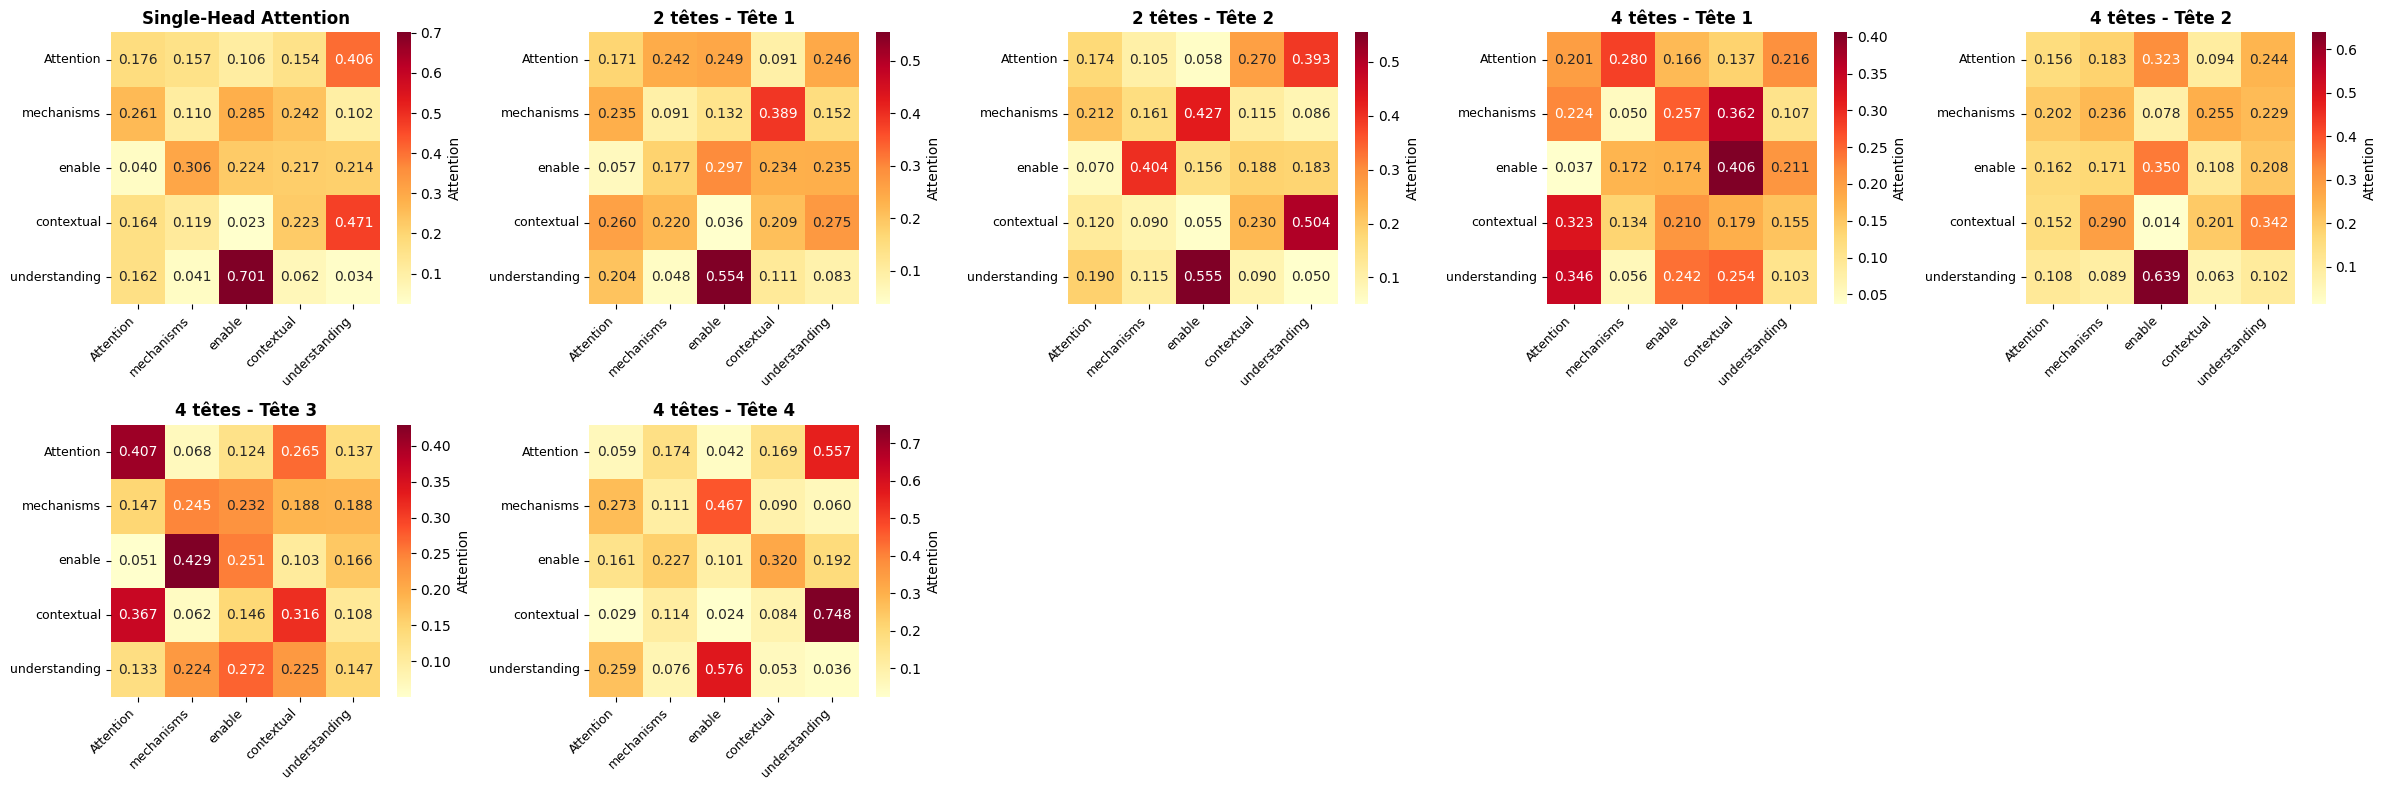

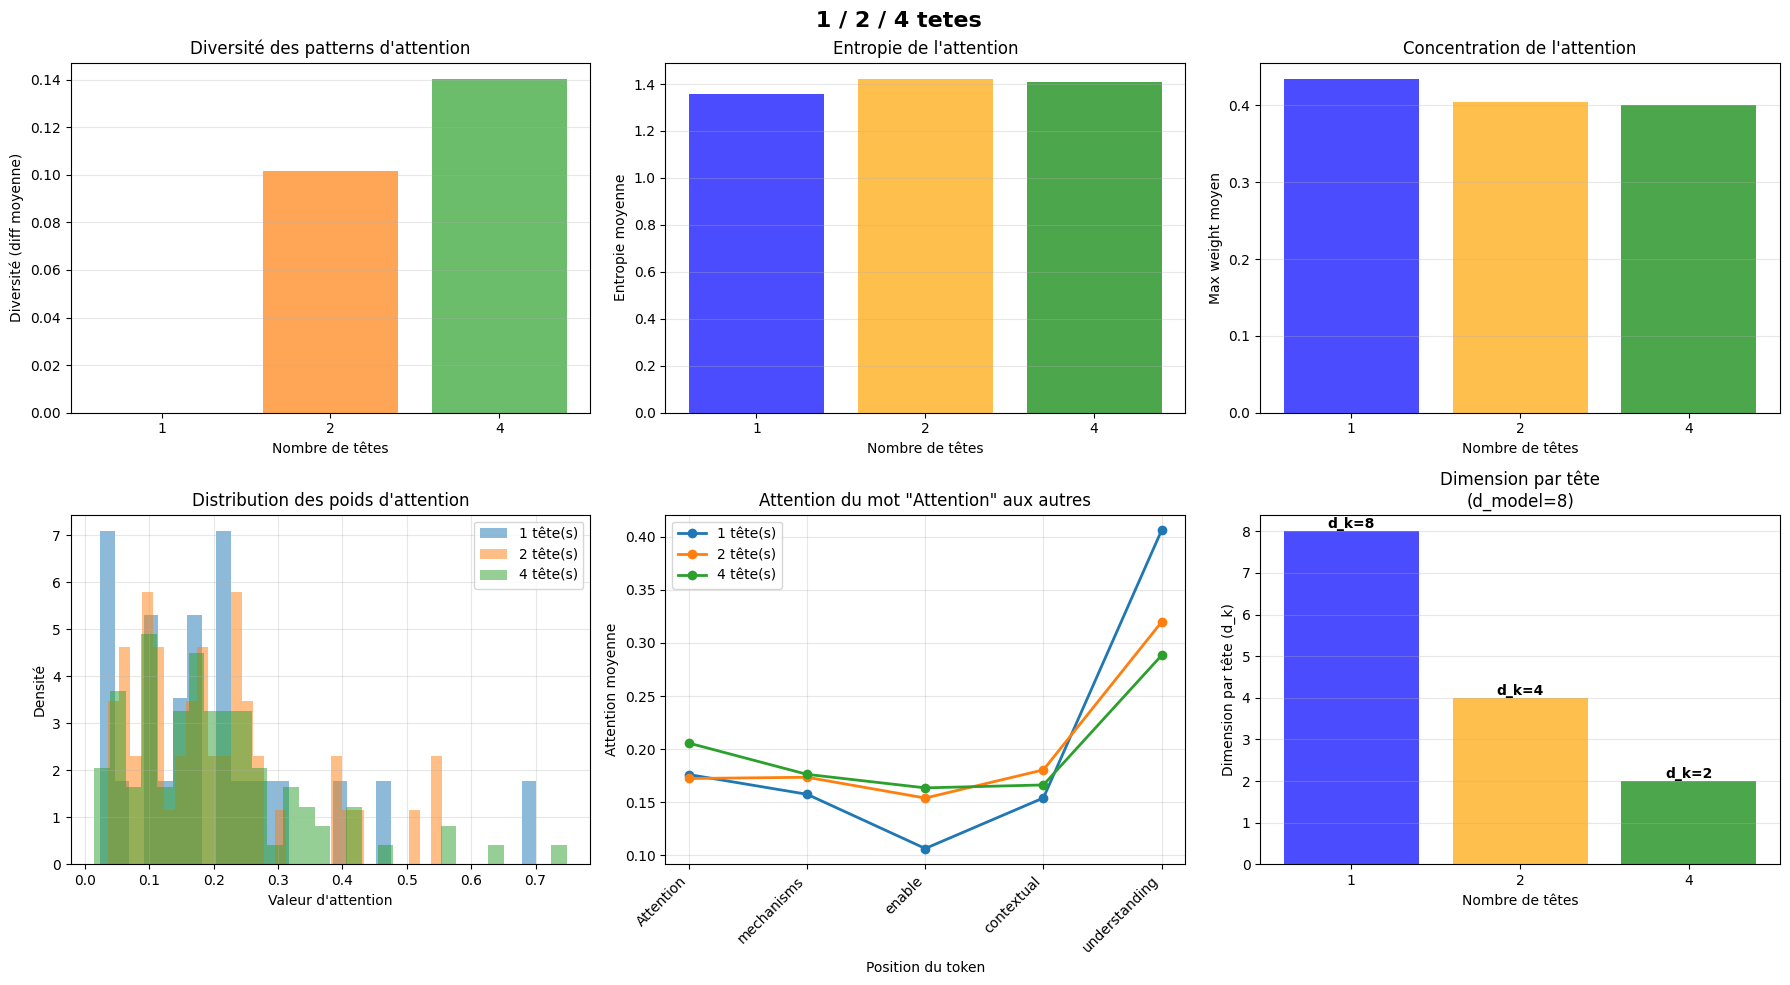

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def multi_head_attention(Q, K, V, num_heads):
    seq_len, d_model = Q.shape
    d_k = d_model // num_heads
    
    Q_heads = Q.reshape(seq_len, num_heads, d_k).transpose(1, 0, 2)  
    K_heads = K.reshape(seq_len, num_heads, d_k).transpose(1, 0, 2)
    V_heads = V.reshape(seq_len, num_heads, d_k).transpose(1, 0, 2)
    
    all_head_weights = []
    head_outputs = []
    
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        weights = softmax(scores)
        output = np.dot(weights, V_heads[i])
        
        all_head_weights.append(weights)
        head_outputs.append(output)
    
    concatenated = np.concatenate(head_outputs, axis=-1)
    
    W_o = np.random.randn(d_model, d_model) * 0.1
    final_output = np.dot(concatenated, W_o)
    
    return final_output, all_head_weights

sentence = ["Attention", "mechanisms", "enable", "contextual", "understanding"]


print(f"\nPhrase: {' '.join(sentence)}")
print(f"nb de mots: {len(sentence)}")

embedding_dim = 8  
np.random.seed(42)
embeddings = {word: np.random.randn(embedding_dim) for word in sentence}
inputs = np.array([embeddings[word] for word in sentence])

print(f"\nEmbedding dim: {embedding_dim}")
print(f"Input shape: {inputs.shape}")

limit = np.sqrt(6.0 / (embedding_dim + embedding_dim))
Wq = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
Wk = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
Wv = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

num_heads_list = [1, 2, 4]
results = {}

for num_heads in num_heads_list:

    
    d_k = embedding_dim // num_heads
    print(f"dim par tête (d_k): {d_k}")
    print(f"Cchaque tête traite: {d_k}/{embedding_dim} = {d_k/embedding_dim:.1%} de l'information")
    
    if num_heads == 1:
        scores = np.dot(Q, K.T) / np.sqrt(embedding_dim)
        attention_weights = softmax(scores)
        output = np.dot(attention_weights, V)
        all_head_weights = [attention_weights]
    else:
        output, all_head_weights = multi_head_attention(Q, K, V, num_heads)
    
    results[num_heads] = {
        'output': output,
        'head_weights': all_head_weights,
        'd_k': d_k
    }
    
    print(f"\nb de têtes créées: {len(all_head_weights)}")
    print(f"shape: {all_head_weights[0].shape}")
    
    for i, weights in enumerate(all_head_weights):
        entropy = -np.sum(weights * np.log(weights + 1e-9)) / len(sentence)
        concentration = np.mean(np.max(weights, axis=1))
        print(f"\ntête {i+1}:")
        print(f"  entropie: {entropy:.4f}")
        print(f"  concentration: {concentration:.4f}")

total_heads = sum(len(results[n]['head_weights']) for n in num_heads_list)
n_cols = 5
n_rows = (total_heads + n_cols - 1) // n_cols

fig = plt.figure(figsize=(24, n_rows * 4))
subplot_idx = 1

for num_heads in num_heads_list:
    head_weights = results[num_heads]['head_weights']
    
    for i, weights in enumerate(head_weights):
        plt.subplot(n_rows, n_cols, subplot_idx)
        sns.heatmap(weights, annot=True, fmt='.3f', cmap='YlOrRd',
                    xticklabels=sentence, yticklabels=sentence,
                    cbar_kws={'label': 'Attention'})
        
        if num_heads == 1:
            plt.title(f'Single-Head Attention', fontweight='bold')
        else:
            plt.title(f'{num_heads} têtes - Tête {i+1}', fontweight='bold')
        
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        subplot_idx += 1

plt.tight_layout()
plt.show()

fig2, axes = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle(' 1 / 2 / 4 tetes', fontsize=16, fontweight='bold')
ax = axes[0, 0]
for num_heads in num_heads_list:
    head_weights = results[num_heads]['head_weights']
    
    if num_heads == 1:
        diversity = 0  
    else:
        diversities = []
        for i in range(len(head_weights)):
            for j in range(i+1, len(head_weights)):
                diff = np.mean(np.abs(head_weights[i] - head_weights[j]))
                diversities.append(diff)
        diversity = np.mean(diversities)
    
    ax.bar(str(num_heads), diversity, alpha=0.7)

ax.set_xlabel('Nombre de têtes')
ax.set_ylabel('Diversité (diff moyenne)')
ax.set_title('Diversité des patterns d\'attention')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[0, 1]
entropies_by_config = []
for num_heads in num_heads_list:
    head_weights = results[num_heads]['head_weights']
    entropies = []
    for weights in head_weights:
        entropy = -np.sum(weights * np.log(weights + 1e-9)) / len(sentence)
        entropies.append(entropy)
    entropies_by_config.append(np.mean(entropies))

ax.bar([str(n) for n in num_heads_list], entropies_by_config, 
       color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Nombre de têtes')
ax.set_ylabel('Entropie moyenne')
ax.set_title('Entropie de l\'attention')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[0, 2]
concentrations_by_config = []
for num_heads in num_heads_list:
    head_weights = results[num_heads]['head_weights']
    concentrations = []
    for weights in head_weights:
        concentration = np.mean(np.max(weights, axis=1))
        concentrations.append(concentration)
    concentrations_by_config.append(np.mean(concentrations))

ax.bar([str(n) for n in num_heads_list], concentrations_by_config,
       color=['blue', 'orange', 'green'], alpha=0.7)
ax.set_xlabel('Nombre de têtes')
ax.set_ylabel('Max weight moyen')
ax.set_title('Concentration de l\'attention')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[1, 0]
for num_heads in num_heads_list:
    head_weights = results[num_heads]['head_weights']
    all_weights = np.concatenate([w.flatten() for w in head_weights])
    ax.hist(all_weights, bins=30, alpha=0.5, label=f'{num_heads} tête(s)', density=True)

ax.set_xlabel('Valeur d\'attention')
ax.set_ylabel('Densité')
ax.set_title('Distribution des poids d\'attention')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
for num_heads in num_heads_list:
    head_weights = results[num_heads]['head_weights']
    avg_attention = np.mean([w[0, :] for w in head_weights], axis=0)
    ax.plot(avg_attention, marker='o', label=f'{num_heads} tête(s)', linewidth=2)

ax.set_xlabel('Position du token')
ax.set_ylabel('Attention moyenne')
ax.set_title('Attention du mot "Attention" aux autres')
ax.set_xticks(range(len(sentence)))
ax.set_xticklabels(sentence, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 2]
d_k_values = [results[n]['d_k'] for n in num_heads_list]
colors = ['blue', 'orange', 'green']
bars = ax.bar([str(n) for n in num_heads_list], d_k_values, color=colors, alpha=0.7)

for bar, dk in zip(bars, d_k_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'd_k={dk}', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Nombre de têtes')
ax.set_ylabel('Dimension par tête (d_k)')
ax.set_title(f'Dimension par tête\n(d_model={embedding_dim})')
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()



3) Implement dropout in the attention mechanism. Apply dropout to the attention weights before computing the final attention output. Visualize the results with and without dropout and discuss the impact on the attention mechanism.


phrase: Dropout prevents overfitting in neural networks
nb  mots: 6

embedding dim: 6
Input shape: (6, 6)
nb de runs: 1
  Mean: 0.1667
  Std: 0.1391
  Non-zeros: 36 / 36
nb de runs: 5
  Mean: 0.1667
  Std: 0.1391
  Non-zeros: 36 / 36
  Mean: 0.1672
  Std: 0.1599
  variabilité inter-runs (std): 0.0000
  Pourcentage de zéros moyen: 11.1%
nb de runs: 5
  Mean: 0.1667
  Std: 0.1391
  Non-zeros: 36 / 36
  Mean: 0.1674
  Std: 0.2116
  variabilité inter-runs (std): 0.0000
  Pourcentage de zéros moyen: 36.1%
nb de runs: 5
  Mean: 0.1667
  Std: 0.1391
  Non-zeros: 36 / 36
  Mean: 0.1444
  Std: 0.2179
  variabilité inter-runs (std): 0.0000
  Pourcentage de zéros moyen: 52.8%


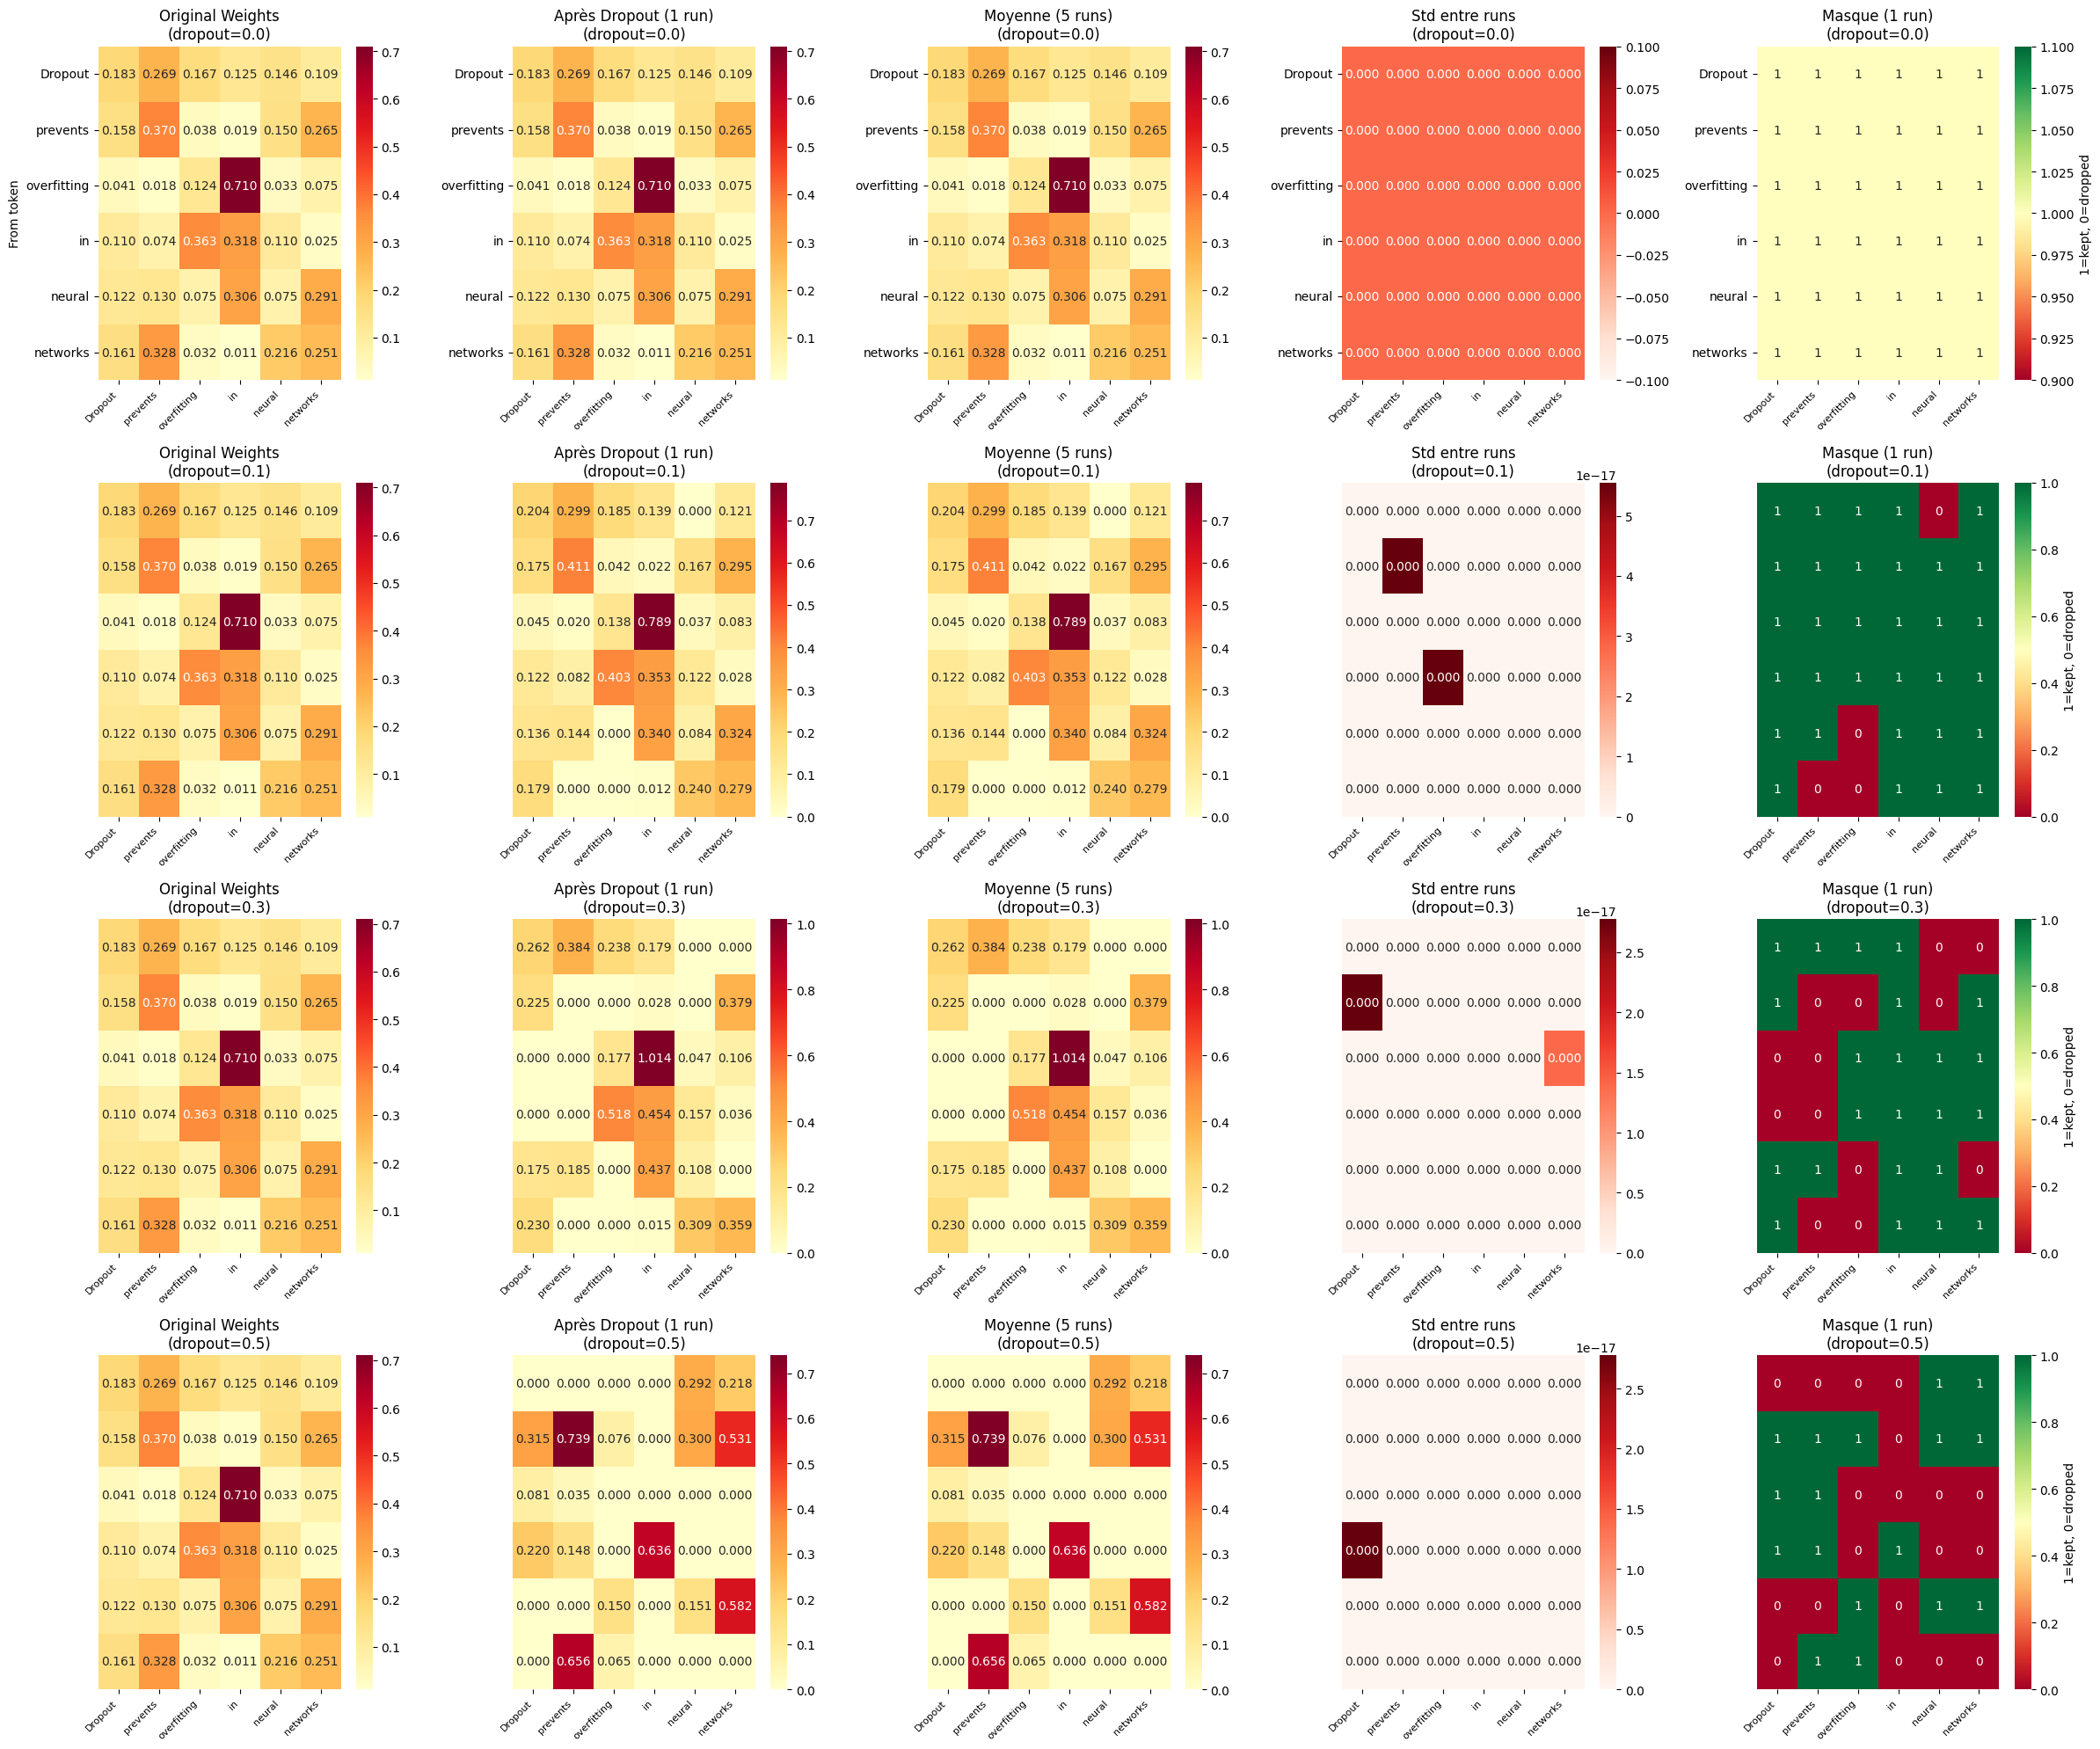

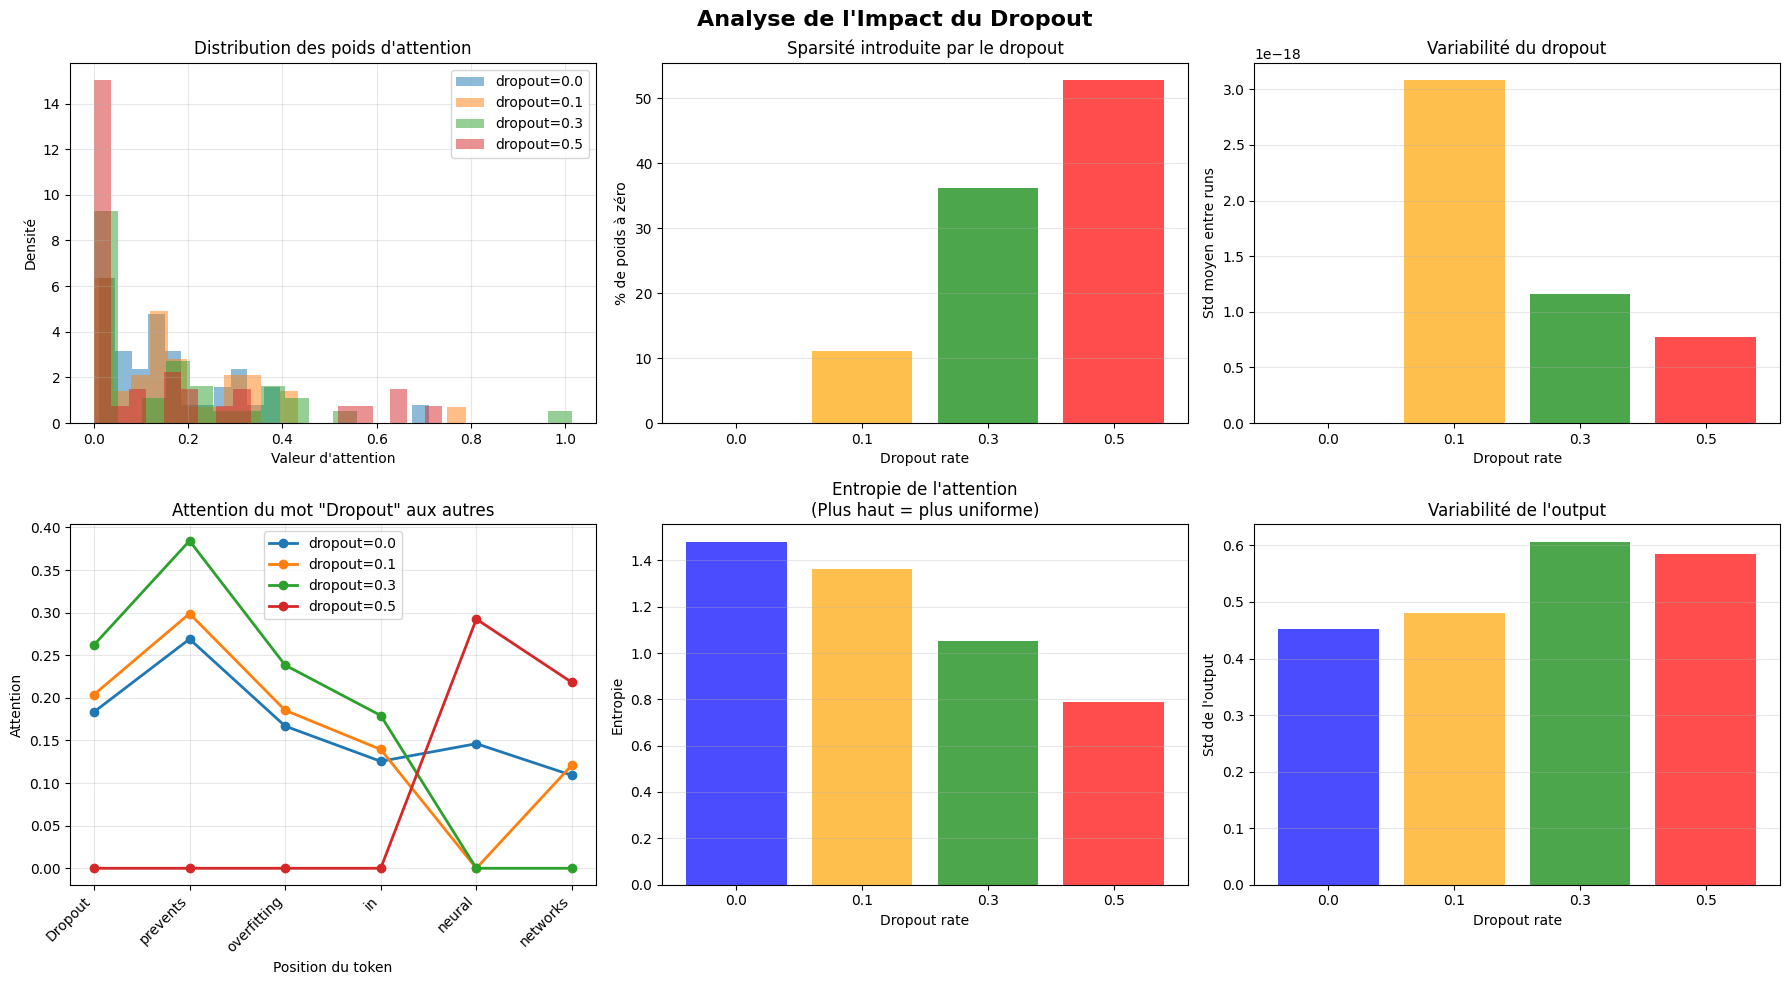


Dropout      % Zéros      Variabilité     Entropie     Std Output  
0.0          0.0          0.0000          1.4810       0.4516      
0.1          11.1         0.0000          1.3636       0.4811      
0.3          36.1         0.0000          1.0513       0.6069      
0.5          52.8         0.0000          0.7892       0.5848      


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def apply_dropout(x, dropout_rate, training=True):
    
    if not training or dropout_rate == 0.0:
        return x
    
    mask = np.random.binomial(1, 1 - dropout_rate, size=x.shape)
    return (x * mask) / (1 - dropout_rate)

def compute_attention_with_dropout(inputs, embedding_dim, dropout_rate, training=True):
    np.random.seed(42)
    limit = np.sqrt(6.0 / (embedding_dim + embedding_dim))
    Wq = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
    Wk = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
    Wv = np.random.uniform(-limit, limit, (embedding_dim, embedding_dim))
    
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)
    
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    attention_weights = softmax(scores)
    attention_weights_dropout = apply_dropout(attention_weights, dropout_rate, training)
    
    output = np.dot(attention_weights_dropout, V)
    
    return Q, K, V, scores, attention_weights, attention_weights_dropout, output

sentence = ["Dropout", "prevents", "overfitting", "in", "neural", "networks"]


print(f"\nphrase: {' '.join(sentence)}")
print(f"nb  mots: {len(sentence)}")

embedding_dim = 6
np.random.seed(42)
embeddings = {word: np.random.randn(embedding_dim) for word in sentence}
inputs = np.array([embeddings[word] for word in sentence])

print(f"\nembedding dim: {embedding_dim}")
print(f"Input shape: {inputs.shape}")

dropout_rates = [0.0, 0.1, 0.3, 0.5]
results = {}

for dropout_rate in dropout_rates:
    num_runs = 5 if dropout_rate > 0 else 1
    all_weights_dropout = []
    all_outputs = []
    
    for run in range(num_runs):
        Q, K, V, scores, weights_original, weights_dropout, output = \
            compute_attention_with_dropout(inputs, embedding_dim, dropout_rate, training=True)
        all_weights_dropout.append(weights_dropout)
        all_outputs.append(output)
    
    avg_weights_dropout = np.mean(all_weights_dropout, axis=0)
    std_weights_dropout = np.std(all_weights_dropout, axis=0)
    avg_output = np.mean(all_outputs, axis=0)
    
    results[dropout_rate] = {
        'Q': Q,
        'K': K,
        'V': V,
        'scores': scores,
        'weights_original': weights_original,
        'weights_dropout': weights_dropout,  # Dernier run
        'avg_weights_dropout': avg_weights_dropout,
        'std_weights_dropout': std_weights_dropout,
        'avg_output': avg_output,
        'all_runs': all_weights_dropout
    }
    
    print(f"nb de runs: {num_runs}")
    print(f"  Mean: {np.mean(weights_original):.4f}")
    print(f"  Std: {np.std(weights_original):.4f}")
    print(f"  Non-zeros: {np.count_nonzero(weights_original)} / {weights_original.size}")
    
    if dropout_rate > 0:
        print(f"  Mean: {np.mean(avg_weights_dropout):.4f}")
        print(f"  Std: {np.std(avg_weights_dropout):.4f}")
        print(f"  variabilité inter-runs (std): {np.mean(std_weights_dropout):.4f}")
        
        zeros_percentage = []
        for w in all_weights_dropout:
            zeros = np.sum(w == 0) / w.size
            zeros_percentage.append(zeros)
        avg_zeros = np.mean(zeros_percentage)
        print(f"  Pourcentage de zéros moyen: {avg_zeros*100:.1f}%")

fig = plt.figure(figsize=(24, 20))

row = 0
for dropout_rate in dropout_rates:
    data = results[dropout_rate]
    
    plt.subplot(len(dropout_rates), 5, row*5 + 1)
    sns.heatmap(data['weights_original'], annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [])
    plt.title(f'Original Weights\n(dropout={dropout_rate})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    if row == 0:
        plt.ylabel('From token')
    
    plt.subplot(len(dropout_rates), 5, row*5 + 2)
    sns.heatmap(data['weights_dropout'], annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [])
    plt.title(f'Après Dropout (1 run)\n(dropout={dropout_rate})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.subplot(len(dropout_rates), 5, row*5 + 3)
    sns.heatmap(data['avg_weights_dropout'], annot=True, fmt='.3f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [])
    plt.title(f'Moyenne (5 runs)\n(dropout={dropout_rate})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.subplot(len(dropout_rates), 5, row*5 + 4)
    sns.heatmap(data['std_weights_dropout'], annot=True, fmt='.3f', cmap='Reds',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [])
    plt.title(f'Std entre runs\n(dropout={dropout_rate})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    plt.subplot(len(dropout_rates), 5, row*5 + 5)
    dropout_mask = (data['weights_dropout'] != 0).astype(float)
    sns.heatmap(dropout_mask, annot=True, fmt='.0f', cmap='RdYlGn',
                xticklabels=sentence, yticklabels=sentence if row == 0 else [],
                cbar_kws={'label': '1=kept, 0=dropped'})
    plt.title(f'Masque (1 run)\n(dropout={dropout_rate})')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    
    row += 1

plt.tight_layout()
plt.show()

fig2, axes = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Analyse de l\'Impact du Dropout', fontsize=16, fontweight='bold')

ax = axes[0, 0]
for dropout_rate in dropout_rates:
    weights = results[dropout_rate]['avg_weights_dropout'].flatten()
    ax.hist(weights, bins=20, alpha=0.5, label=f'dropout={dropout_rate}', density=True)
ax.set_xlabel('Valeur d\'attention')
ax.set_ylabel('Densité')
ax.set_title('Distribution des poids d\'attention')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
zero_percentages = []
for dropout_rate in dropout_rates:
    if dropout_rate == 0:
        zero_percentages.append(0)
    else:
        all_runs = results[dropout_rate]['all_runs']
        zeros = np.mean([np.sum(w == 0) / w.size for w in all_runs])
        zero_percentages.append(zeros * 100)

ax.bar([str(d) for d in dropout_rates], zero_percentages, 
       color=['blue', 'orange', 'green', 'red'], alpha=0.7)
ax.set_xlabel('Dropout rate')
ax.set_ylabel('% de poids à zéro')
ax.set_title('Sparsité introduite par le dropout')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[0, 2]
variabilities = []
for dropout_rate in dropout_rates:
    std = np.mean(results[dropout_rate]['std_weights_dropout'])
    variabilities.append(std)

ax.bar([str(d) for d in dropout_rates], variabilities,
       color=['blue', 'orange', 'green', 'red'], alpha=0.7)
ax.set_xlabel('Dropout rate')
ax.set_ylabel('Std moyen entre runs')
ax.set_title('Variabilité du dropout')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[1, 0]
for dropout_rate in dropout_rates:
    weights = results[dropout_rate]['avg_weights_dropout'][0, :]
    ax.plot(weights, marker='o', label=f'dropout={dropout_rate}', linewidth=2)
ax.set_xlabel('Position du token')
ax.set_ylabel('Attention')
ax.set_title('Attention du mot "Dropout" aux autres')
ax.set_xticks(range(len(sentence)))
ax.set_xticklabels(sentence, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
entropies = []
for dropout_rate in dropout_rates:
    weights = results[dropout_rate]['avg_weights_dropout']
    weights_safe = weights + 1e-9
    entropy = -np.sum(weights_safe * np.log(weights_safe)) / len(sentence)
    entropies.append(entropy)

ax.bar([str(d) for d in dropout_rates], entropies,
       color=['blue', 'orange', 'green', 'red'], alpha=0.7)
ax.set_xlabel('Dropout rate')
ax.set_ylabel('Entropie')
ax.set_title('Entropie de l\'attention\n(Plus haut = plus uniforme)')
ax.grid(True, axis='y', alpha=0.3)

ax = axes[1, 2]
output_stds = []
for dropout_rate in dropout_rates:
    output = results[dropout_rate]['avg_output']
    output_stds.append(np.std(output))

ax.bar([str(d) for d in dropout_rates], output_stds,
       color=['blue', 'orange', 'green', 'red'], alpha=0.7)
ax.set_xlabel('Dropout rate')
ax.set_ylabel('Std de l\'output')
ax.set_title('Variabilité de l\'output')
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print(f"\n{'Dropout':<12} {'% Zéros':<12} {'Variabilité':<15} {'Entropie':<12} {'Std Output':<12}")

for dropout_rate in dropout_rates:
    data = results[dropout_rate]
    if dropout_rate == 0:
        zeros_pct = 0.0
    else:
        all_runs = data['all_runs']
        zeros_pct = np.mean([np.sum(w == 0) / w.size for w in all_runs]) * 100
    
    variability = np.mean(data['std_weights_dropout'])
    
    weights = data['avg_weights_dropout'] + 1e-9
    entropy = -np.sum(weights * np.log(weights)) / len(sentence)
    

    output_std = np.std(data['avg_output'])
    
    print(f"{dropout_rate:<12.1f} {zeros_pct:<12.1f} {variability:<15.4f} {entropy:<12.4f} {output_std:<12.4f}")



Plus le taux de dropout augmente, plus les matrices d’attention ont  beaucoup de valeurs nulles et irrégulières d’un run à l’autre.

Le pourcentage de poids à zéro augmente fortement avec le taux de dropout.

L’entropie diminue 

La variabilité de l’output augmente  légèrement, montrant une influence du dropout sur la stabilité des activations.

